<a href="https://colab.research.google.com/github/cufuentes/CodingDojo/blob/main/bagged_random_forest_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [3]:
filename = "/content/Boston_Housing_from_Sklearn.csv"
df= pd.read_csv(filename)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [4]:
#separamos conjuntos de ensayo y prueba
X = df.drop(columns="PRICE")
y = df["PRICE"]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

Primero intentamos con regresion normal

In [7]:
#instanciamos el modelo
dec_tree = DecisionTreeRegressor(random_state=42)

#ajustamos el modelo
dec_tree.fit(X_train,y_train)

#obtenemos resultados
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

#evaluamos
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test,y_test)
print(train_score)
print(test_score)

1.0
0.6193230918136841


In [12]:
#revisamos parametros
print(dec_tree.get_depth())
print(dec_tree.get_n_leaves())
dec_tree.get_params()

20
360


{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

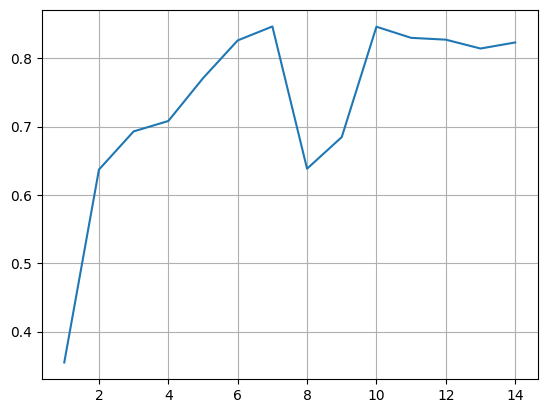

In [13]:
#buscamos parametros optimos
depth_list = list(range(1,15))
r2=[]
for depth in depth_list:
  dec_tree = DecisionTreeRegressor(random_state=42,max_depth=depth)
  dec_tree.fit(X_train,y_train)
  score = dec_tree.score(X_test,y_test)
  r2.append(score)

#graficcamos resultados
plt.plot(depth_list,r2)
plt.grid()
plt.show()

In [14]:
#instanciamos el modelo con nuevos parametros
dec_tree = DecisionTreeRegressor(random_state=42,max_depth=7)

#ajustamos el modelo
dec_tree.fit(X_train,y_train)

#obtenemos resultados
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

#evaluamos
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test,y_test)
print(train_score)
print(test_score)

0.958516936961625
0.8463768203632204


Ahora probamos con bagged trees

In [15]:
#instanciamos el modelo
bagreg= BaggingRegressor(random_state=42)

#entrenamos el modelo
bagreg.fit(X_train, y_train)

#evaluamos el modelo
bagreg_train_score = bagreg.score(X_train,y_train)
bagreg_test_score = bagreg.score(X_test,y_test)
print(bagreg_train_score)
print(bagreg_test_score)

0.9606756023782893
0.8204208271364619


In [16]:
#revisamos los parametros
bagreg.get_params()

{'base_estimator': 'deprecated',
 'bootstrap': True,
 'bootstrap_features': False,
 'estimator': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

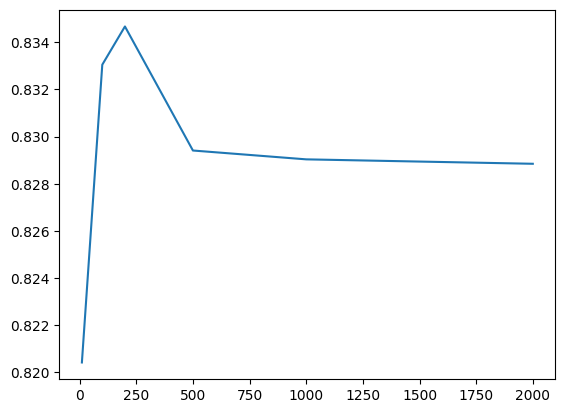

In [19]:
#buscamos los estimadores optimos
n = [10,100,200,500,1000,2000]

score_list=[]
for i in n:
  bagreg = BaggingRegressor(n_estimators=i,random_state=42)
  bagreg.fit(X_train,y_train)
  score = bagreg.score(X_test,y_test)
  score_list.append(score)

plt.plot(n,score_list)
plt.show()

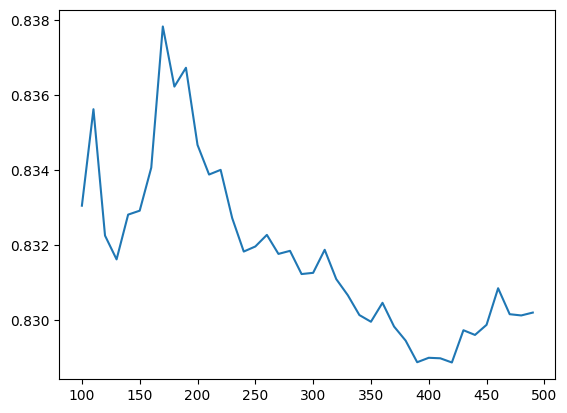

In [20]:
#buscamos los estimadores optimos en un rango más acotado
n = list(range(100,500,10))

score_list=[]
for i in n:
  bagreg = BaggingRegressor(n_estimators=i,random_state=42)
  bagreg.fit(X_train,y_train)
  score = bagreg.score(X_test,y_test)
  score_list.append(score)

plt.plot(n,score_list)
plt.show()

In [21]:
#definimos el optimo en max_depth =180
bagreg = BaggingRegressor(n_estimators=180,random_state=42)
bagreg.fit(X_train,y_train)
print(bagreg.score(X_train,y_train))
print(bagreg.score(X_test,y_test))


0.9767567267233872
0.8362257547025986


Ahora probamos con random forest

In [22]:
#instanciamos el modelo
rf = RandomForestRegressor(random_state=42)

#entrenamos el modelo
rf.fit(X_train,y_train)

#evaluamos el modelo
rf_train_score = rf.score(X_train,y_train)
rf_test_score = rf.score(X_test,y_test)
print(rf_train_score)
print(rf_test_score)

0.9771342521069045
0.8338530730048258
